In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
df.drop(columns=['CASENUM'],inplace=True)
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [4]:
df.fillna({'CLMSEX':df.CLMSEX.mode()[0],
           'CLMINSUR':df.CLMINSUR.mode()[0],
           'SEATBELT':df.SEATBELT.mode()[0],
           'CLMAGE':df.CLMAGE.median()},inplace=True)

In [5]:
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(30)

In [8]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

np.int64(0)

In [9]:
target = df[['ATTORNEY']]
features = df.drop(columns=['ATTORNEY'])

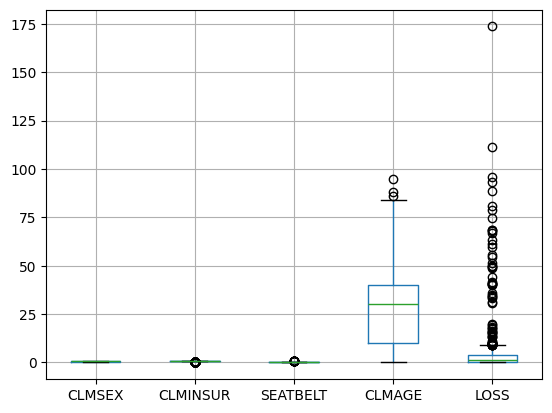

In [14]:
# Outliers
features.boxplot()
plt.show()

In [15]:
### outlier capping
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]= df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(include=['int','float']).columns:
    outlier_capping(features,col)

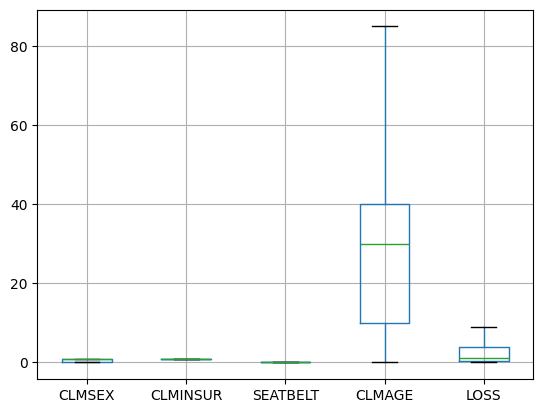

In [16]:
# Outliers
features.boxplot()
plt.show()

In [19]:
# Feature Selection
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')
f_clas = f_classif(features,target)
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False)

LOSS        254.422256
CLMSEX        8.330345
CLMAGE        0.189548
CLMINSUR           NaN
SEATBELT           NaN
dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=200)   
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1113, 5) (197, 5) (1113, 1) (197, 1)


In [28]:
std_sca = StandardScaler()

In [29]:
X_train[['CLMAGE', 'LOSS']] = std_sca.fit_transform(X_train[['CLMAGE', 'LOSS']])
X_test[['CLMAGE', 'LOSS']] = std_sca.transform(X_test[['CLMAGE', 'LOSS']])

In [30]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7258883248730964

In [31]:
import pickle

In [32]:
file = 'log16.pkl'

In [33]:
pickle.dump(log_model, open(file, 'wb'))

In [34]:
file1 = 'std_sca.pkl'

In [35]:
pickle.dump(std_sca, open(file1, 'wb'))